In [12]:
import json
# Load the dictionary containing filenames and titles from the JSON file
with open('data_final.json', 'r') as json_file:
    data = json.load(json_file)
# Extract titles from the dictionary

In [37]:
# Key for which you want to calculate the sum of values
target_key = 'Words'
# Initialize a variable to store the sum
total_words = 0
total_sentences = 0

# Iterate through the list of dictionaries and calculate the sum
for dictionary in data:
    # Check if the dictionary contains the 'Words' key
    if 'Words' in dictionary:
        total_words += dictionary['Words']
    if 'Sentences' in dictionary:
        total_sentences += dictionary['Sentences']

# Print the total sum of 'Words'
print(f"Total sum of 'Words': {total_words}, total {total_sentences} sentences, average {total_words/total_sentences} words per sentence")

Total sum of 'Words': 3281784, total 450777 sentences, average 7.28028271185087 words per sentence


In [17]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from collections import Counter
from nltk.corpus import stopwords
import spacy
import re
import string


# Define a function to filter out verbs
def filter_verbs(text):
    doc = nlp(text)
    filtered_text = [token.text for token in doc if token.pos_ != "VERB"]
    return " ".join(filtered_text)

def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(f"[{re.escape(string.punctuation)}]", "", text)  # Remove punctuation
    return text

# Load the French language model
nlp = spacy.load("fr_core_news_sm")
# Get the French stopwords
french_stopwords_spacy = nlp.Defaults.stop_words

# Download the nltk French stopwords dataset
nltk.download("stopwords")
french_stopwords = set(stopwords.words("french"))
english_stopwords = set(stopwords.words("english"))
# french_stopwords.add("pouvoir")
# french_stopwords.add("savoir")
french_stopwords.add("faire")


corpus=[]
for article in data:
    text = article["TextData"]
    lowercase_text = text.lower()
    corpus.append(lowercase_text)
    
# French text
full_text = " ".join(corpus)

preprocessed_corpus=[]
i=0
for text in corpus:
    words = text.split()
    filtered_words = [word for word in words 
                      if word.lower() not in french_stopwords 
                      and word.lower() not in french_stopwords_spacy]
    preprocessed_text = " ".join(filtered_words)
    i=i+1
    print(i, len(text), len(preprocessed_text))
    preprocessed_corpus.append(preprocessed_text)
    
preprocessed_corpus = [preprocess_text(doc) for doc in preprocessed_corpus]

[nltk_data] Downloading package punkt to /home/sau/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/sau/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


1 70844 49916
2 84857 50398
3 17482 14236
4 117642 91735
5 26857 22989
6 15413 12146
7 184711 125947
8 15307 13011
9 2597 2198
10 1794 1495
11 9361 7651
12 14673 12123
13 34682 27740
14 7171 5979
15 10653 8710
16 23702 19077
17 10068 8453
18 34354 28286
19 3574 2762
20 22213 17807
21 18339 14982
22 51197 40739
23 14557 11545
24 4818 3855
25 27466 23074
26 137381 111623
27 20894 16658
28 26469 20505
29 1332 1071
30 3227 2780
31 51214 42177
32 19839 13093
33 95327 60418
34 18363 11546
35 14592 9518
36 23989 15816
37 32615 21374
38 13322 8394
39 12754 8542
40 14423 11918
41 30137 24471
42 7623 6120
43 488 414
44 11168 9099
45 13307 11307
46 172109 124314
47 17434 14115
48 7619 6323
49 27368 21516
50 4424 3728
51 3275 2668
52 3026 2587
53 3223 2695
54 10372 8539
55 891 612
56 18189 15286
57 28924 24542
58 58738 39913
59 10776 8658
60 38927 32016
61 352 279
62 489 415
63 338 274
64 418 347
65 407 348
66 35130 29236
67 1651 1468
68 34260 26997
69 7547 6340
70 23466 18885
71 153222 122142
72 

581 28291 24015
582 54607 45783
583 11200 9059
584 25917 21897
585 9941 8293
586 74014 62824
587 7330 6147
588 12671 9467
589 251692 206238
590 8250 6834
591 5218 4241
592 3479 2497
593 2458 2022
594 1941 983
595 14693 12119
596 4915 3184
597 2942 1452
598 3170 1572
599 1346 1179
600 1713 1488
601 1687 1462
602 21358 17198
603 40341 31864
604 80310 64766
605 14858 11763
606 37105 28812
607 1732 785
608 3000 1329
609 4390 3424
610 7947 6634
611 6826 5592
612 16348 13479
613 11096 9139
614 8058 6722
615 9786 7945
616 20846 17532
617 5843 3771
618 3047 2361
619 2753 2256
620 4920 3970
621 3342 2811
622 14517 12260
623 32416 25570
624 120765 101000
625 38237 29222
626 6429 5322
627 6892 5714
628 6465 5400
629 3638 2943
630 550 454
631 6686 4750
632 477 398
633 2810 2303
634 1397 1142
635 1849 1654
636 6109 5196
637 7440 6433
638 7325 6311
639 7446 6395
640 6254 5300
641 48049 36813
642 12588 10565
643 15626 10188
644 16956 10872
645 23589 19709
646 1695 1377
647 1847 1511
648 27318 22358
6

In [18]:
# Tokenize the text into words
full_text = " ".join(preprocessed_corpus)
words = word_tokenize(full_text, language='french')

# Count word frequencies
word_freq = Counter(words)

# Calculate vocabulary size and most common words
vocabulary_size = len(word_freq)
most_common_words = word_freq.most_common(50)

# Print vocabulary analysis
print(f"Vocabulary size: {vocabulary_size}")
print("Most common words:")
for word, freq in most_common_words:
    print(f"{word}: {freq}")


Vocabulary size: 295569
Most common words:
grand: 10117
bien: 9077
an: 7705
saigon: 6711
jour: 6483
voir: 6432
société: 6097
homme: 6024
trouver: 5882
donner: 5805
venir: 5794
pouvoir: 5790
chinois: 5688
prendre: 5505
année: 5288
nom: 4952
pays: 4930
général: 4850
in: 4550
devoir: 4490
roi: 4412
petit: 4367
long: 4347
tre: 4171
vouloir: 4072
nam: 4062
ao: 4059
the: 3940
dernier: 3882
nguy: 3878
chine: 3844
mettre: 3840
mois: 3829
non: 3773
falloir: 3763
lettre: 3750
cochinchine: 3712
savoir: 3637
membre: 3606
temps: 3591
ancien: 3546
partie: 3468
français: 3308
note: 3275
sud: 3274
chef: 3216
annamite: 3214
ordre: 3213
aller: 3207
travail: 3190


In [21]:
import nltk
nltk.download('punkt')
from nltk.util import ngrams
from nltk.collocations import BigramAssocMeasures, BigramCollocationFinder

from nltk import FreqDist

words_for_ngrams = [word for word in words if word not in english_stopwords and word != 'ao']

# Create bigrams (pairs of consecutive words)
bigrams = list(ngrams(words_for_ngrams, 2))

# Find collocations (frequently occurring bigrams)
bigram_measures = BigramAssocMeasures()
finder = BigramCollocationFinder.from_words(words)
collocations = finder.nbest(bigram_measures.likelihood_ratio, 15)


# Create a frequency distribution of bigrams
bigram_freq = FreqDist(bigrams)

# Print the frequency of each bigram
for bigram, freq in bigram_freq.most_common(20):
    print(f"{bigram}: {freq} times")

# print("\nCollocations:")
# for collocation in collocations:
#     print(collocation)


[nltk_data] Downloading package punkt to /home/sau/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


('extrême', 'orient'): 1138 times
('société', 'etude'): 762 times
('conner', 'tre'): 672 times
('procès', 'verbal'): 606 times
('point', 'vue'): 602 times
('secrétaire', 'général'): 594 times
('viêt', 'nam'): 581 times
('etude', 'indochinois'): 555 times
('ordre', 'jour'): 498 times
('membre', 'société'): 454 times
('séance', 'lever'): 454 times
('grand', 'nombre'): 418 times
('jeune', 'fille'): 398 times
('société', 'etudes'): 396 times
('vice', 'président'): 389 times
('assemblée', 'général'): 367 times
('ong', 'ming'): 360 times
('bien', 'vouloir'): 349 times
('gouverneur', 'général'): 345 times
('jour', 'épuiser'): 323 times


In [22]:
# Create trigrams
trigrams = list(ngrams(words_for_ngrams, 3))

# Count the frequency of each trigram
trigram_counts = Counter(trigrams)

# Print the most common trigrams
most_common_trigrams = trigram_counts.most_common(20)  # Change 10 to the desired number
for trigram, count in most_common_trigrams:
    print(trigram, "-", count)


('société', 'etude', 'indochinois') - 481
('ordre', 'jour', 'épuiser') - 307
('épuiser', 'séance', 'lever') - 255
('jour', 'épuiser', 'séance') - 251
('société', 'etudes', 'indochinois') - 220
('ecole', 'française', 'extrême') - 208
('française', 'extrême', 'orient') - 208
('séance', 'lever', 'heure') - 202
('comité', 'société', 'etude') - 189
('procès', 'verbal', 'séance') - 176
('phan', 'thanh', 'gian') - 153
('etude', 'indochinois', 'réunir') - 139
('société', 'etude', 'lndochinoise') - 127
('procès', 'verbal', 'dernier') - 126
('réunir', 'séance', 'ordinaire') - 122
('verbal', 'dernier', 'séance') - 116
('comité', 'agricole', 'industriel') - 104
('administrateur', 'service', 'civil') - 104
('correspondance', 'arrivée', 'départ') - 92
('séance', 'lever', 'secrétaire') - 87


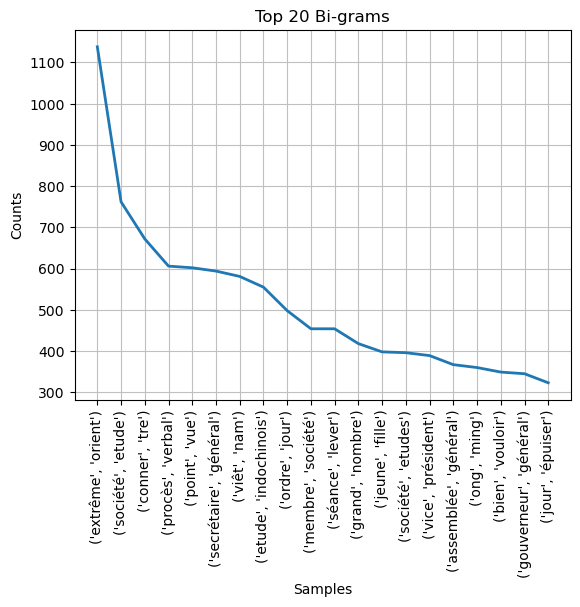

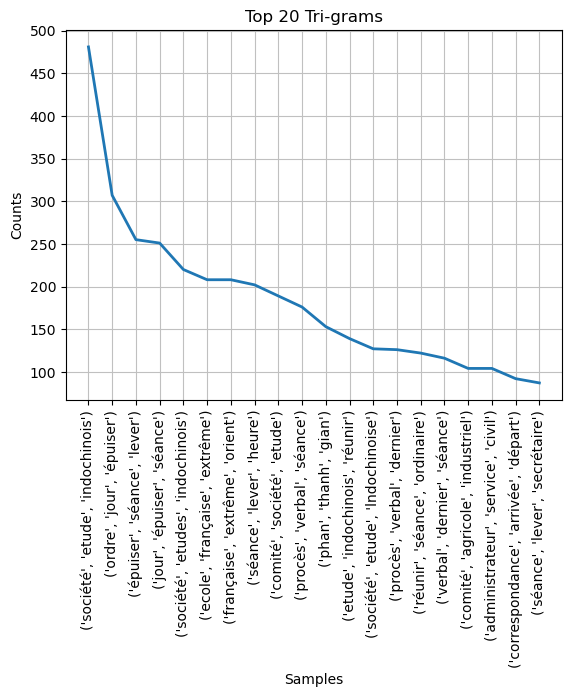

<Axes: title={'center': 'Top 20 Tri-grams'}, xlabel='Samples', ylabel='Counts'>

In [23]:
# Plot frequency distributions
bigram_freq.plot(20, title="Top 20 Bi-grams")
tri_gram_freq = FreqDist(trigrams)
tri_gram_freq.plot(20, title="Top 20 Tri-grams")

In [24]:

# Get a list of common English stop words
stop_words_en = set(stopwords.words('english'))

# Get a list of common English stop words
stop_words_fr = french_stopwords_spacy

# Initialize an empty list to store the stopwords
vietnamese_stopwords = []

# Read the stopwords from the text file
with open('vietnamese-stopwords.txt', 'r', encoding='utf-8') as file:
    for line in file:
        word = line.strip()  # Remove leading/trailing whitespace and newline characters
        if word:  # Ensure the line is not empty
            vietnamese_stopwords.append(word)

# Identify and count common stop words
common_stop_words_fr = [word for word in words if word in stop_words_fr] 
common_stop_word_counts_fr = Counter(common_stop_words_fr)

common_stop_words_en = [word for word in words if word in stop_words_en] 
common_stop_word_counts_en = Counter(common_stop_words_en)

common_stop_words_vn = [word for word in words if word in vietnamese_stopwords] 
common_stop_word_counts_vn = Counter(common_stop_words_vn)

# Print common stop words and their frequencies
for word, count in common_stop_word_counts_fr.most_common(20):
    print(f"'{word}': {count} times")

# Calculate the percentage of stop words in the corpus
total_words = len(words)
total_stop_words = len(common_stop_words_fr)
stop_word_percentage = (total_stop_words / total_words) * 100
print(f"Percentage of French stop words in the corpus: {stop_word_percentage:.2f}%")


# Print common stop words and their frequencies
for word, count in common_stop_word_counts_en.most_common(20):
    print(f"'{word}': {count} times")

# Calculate the percentage of stop words in the corpus
total_words = len(words)
total_stop_words = len(common_stop_words_en)
stop_word_percentage = (total_stop_words / total_words) * 100
print(f"Percentage of English stop words in the corpus: {stop_word_percentage:.2f}%")


# Print common stop words and their frequencies
for word, count in common_stop_word_counts_vn.most_common(20):
    print(f"'{word}': {count} times")

# Calculate the percentage of stop words in the corpus
total_words = len(words)
total_stop_words = len(common_stop_words_vn)
stop_word_percentage = (total_stop_words / total_words) * 100
print(f"Percentage of Vietnamese stop words in the corpus: {stop_word_percentage:.2f}%")


'etc': 772 times
'le': 28 times
'sept': 26 times
'se': 24 times
'la': 13 times
'ne': 12 times
'me': 10 times
'en': 10 times
'on': 9 times
'hi': 8 times
'de': 8 times
'sa': 7 times
'ai': 6 times
'du': 5 times
'na': 4 times
'et': 4 times
'te': 4 times
'les': 4 times
'un': 4 times
'ni': 4 times
Percentage of French stop words in the corpus: 0.04%
'an': 7705 times
'in': 4550 times
'the': 3940 times
'of': 2957 times
'and': 1712 times
'it': 1599 times
'no': 1532 times
'to': 1201 times
're': 1156 times
'but': 1027 times
'is': 958 times
'at': 670 times
'do': 653 times
'don': 636 times
'am': 550 times
'so': 489 times
'can': 381 times
'her': 373 times
'for': 369 times
'he': 362 times
Percentage of English stop words in the corpus: 1.33%
'con': 1527 times
'thanh': 1299 times
'cho': 1131 times
'ba': 941 times
'ra': 936 times
'anh': 901 times
'trong': 846 times
'cha': 755 times
'em': 710 times
'sang': 682 times
'mà': 670 times
'do': 653 times
'mang': 618 times
'cao': 614 times
'và': 589 times
'so':

In [27]:
# sentiment analysis

import nltk
from textblob import TextBlob
from collections import defaultdict

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

sentiment_by_year = defaultdict(list)

for doc in data:
    text = doc["TextData"]
    year = doc["LatestYear"]
    title = doc["FolderName"][:-7]
    blob = TextBlob(text)
    sentiment = blob.sentiment
    sentiment_by_year[year].append(sentiment)
    print(sentiment.polarity, ";", sentiment.subjectivity,";", year, ";", title)

average_sentiment_by_year = {}
for year, sentiments in sentiment_by_year.items():
    avg_polarity = sum(sent.polarity for sent in sentiments) / len(sentiments)
    avg_subjectivity = sum(sent.subjectivity for sent in sentiments) / len(sentiments)
    average_sentiment_by_year[year] = (avg_polarity, avg_subjectivity)

years = list(average_sentiment_by_year.keys())
avg_polarities = [sentiments[0] for sentiments in average_sentiment_by_year.values()]
avg_subjectivities = [sentiments[1] for sentiments in average_sentiment_by_year.values()]


[nltk_data] Downloading package punkt to /home/sau/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/sau/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /home/sau/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0.20057858807858808 ; 0.606055402930403 ; 1943 ; vo-di-nguy-1745-1801-amiral-de-gialong_1943_tome_xviii
0.1035978835978836 ; 0.6086772486772486 ; 1900 ; vocabulaire-annamite-français_1900_semestre_1
0.16460017969451934 ; 0.5338724168912846 ; 1936 ; vue-d-ensemble-sur-la-sculpture-et-le-modelage-en-chine-durant-vingt-siècles_1936_tome_xi
0.23220930232558148 ; 0.6128792912513845 ; 1910 ; vérification-des-dates-des-inscriptions-des-monuments-khmers-seconde-partie_1910_semestre_1
0.17770562770562764 ; 0.5349206349206347 ; 1956 ; etude-de-procédés-de-fonderie-artisanale-au-viêt-nam_1956_tome_xxxi
0.12890365448504987 ; 0.5477297895902545 ; 1973 ; etude-de-quelques-monuments-représentatifs-de-l-art-français-à-saigon-dans-les-années-1877-1908_1973_tome_xlviii
0.04201733563516045 ; 0.6256617752841325 ; 1962 ; etude-des-phonèmes-vietnamiens-par-confrontation-entre-le-vietnamien-et-quelques-dialectes-des-hauts-plateaux-du-sud-viêt-nam_1962_tome_xxxvii
0.29259259259259257 ; 0.7 ; 1927 ; actes-de-l

0.07048726467331118 ; 0.353156146179402 ; 1951 ; folklore-musical-jaraï-et-bahnar_1951_tome_xxvi
0.1325396825396826 ; 0.6725396825396825 ; 1934 ; folkore-laotien-xine-xay_1934_tome_ix
0.18747762262799847 ; 0.642230576441103 ; 1936 ; henri-maître-explorateur-de-l-indochine-sud-centrale-1883-1914_1936_tome_xi
0.20502873563218388 ; 0.7045771756978652 ; 1972 ; histoire-de-keo-preah-phleung-d-après-les-annales-des-rois-khmers_1972_tome_xlvii
0.227046783625731 ; 0.6072681704260652 ; 1959 ; histoire-de-l-acupuncture-chinoise_1959_tome_xxxiv
0.10388655462184876 ; 0.5710784313725489 ; 1957 ; histoire-du-ou-pao-an-celui-qui-sacrifia-sa-propre-famille-pour-racheter-la-vie-d-un-ami-récit-de-l-époque-des-ming_1957_tome_xxxii
0.26458333333333334 ; 0.6604166666666667 ; 1947 ; in-mémoriam-léon-louis-sogny-1880-1947_1947_tome_xxii
0.3037037037037037 ; 0.7296296296296296 ; 1933 ; inauguration-du-monument-de-jean-baptiste-louis-pierre-au-jardin-botanique-de-saigon-23-février-1933_1933_tome_viii
0.1732864

0.15822880296564415 ; 0.6348188884373073 ; 1963 ; les-trois-royaumes-traduction-notes-et-commentaires-de-nghiêm-toản-et-louis-ricaud-tome-iii_1963_tome_xxxviii
0.1683255572835667 ; 0.6267144338295173 ; 1961 ; les-trois-royaumes-traduction-notes-et-commentaires-de-nghiêm-toản-et-louis-ricaud-tome_-ii_1961_tome_xxxvi
0.15644257703081169 ; 0.6223123426585822 ; 1960 ; les-trois-royaumes-traduction-notes-et-commentaires-de-nghiêm-toản-et-louis-ricaud-tome_-i_1960_tome_xxxv
0.284375 ; 0.721875 ; 1952 ; les-vietnamiens-et-les-insectes_1952_tome_xxvii
0.1707575757575758 ; 0.5672294372294371 ; 1951 ; les-villages-du-plateau-des-bolovens_1951_tome_xxvi
-0.025 ; 0.23333333333333334 ; 1900 ; liste-des-membres-de-la-société-des-etudes-indochinoises-au-1er-janvier-1900_1899_semestre_2
0.024999999999999998 ; 0.2958333333333333 ; 1901 ; liste-des-membres-de-la-société-des-etudes-indochinoises-au-1er-janvier-1901_1900_semestre_2
0.15 ; 0.4041666666666667 ; 1900 ; liste-des-membres-de-la-société-des-etu

0.0023809523809523794 ; 0.3720238095238096 ; 1935 ; procès-verbaux-et-assemblée-générale-de-l-année-1935_1935_tome_x
-0.022222222222222223 ; 0.22037037037037036 ; 1911 ; liste-générale-des-membres-de-la-société-des-etudes-indochinoises_1911_semestre_2
0.15214285714285714 ; 0.5567460317460318 ; 1950 ; macao-à-la-fin-du-xviiie-siècle_1950_tome_xxv
0.10714285714285712 ; 0.6571428571428571 ; 1911 ; mémoire-laissé-à-la-postérité-comme-expression-d-adieux-et-rédigé-pendant-sa-dernière-maladie-par-mai-thanh-cong-chef-de-2e-classe-du-canton-de-bao-thanh-province-de-bentré_1911_semestre_1
0.0 ; 0.0 ; 1888 ; publication-reçues-par-la-société_1888_t3
0.0 ; 0.0 ; 1898 ; publications-de-la-société-des-etudes-indochinoises_1898
-0.03333333333333333 ; 0.3 ; 1904 ; publications-de-la-société-des-etudes-indochinoises_1904_semestre_2
-0.5 ; 0.29999999999999993 ; 1909 ; publications-de-la-société-des-etudes-indochinoises_1909_semestre_1
0.0 ; 0.0 ; 1936 ; publications-de-la-société-des-etudes-indochinois

0.11969696969696969 ; 0.5575757575757576 ; 1909 ; monographie-du-béribéri_1909_semestre_2
0.1775087887503995 ; 0.6015739852988177 ; 1908 ; monographie-du-centre-administratif-de-dong-trieu-province-de-hai-duong-tonkin_1908_semestre_2
0.04763071895424839 ; 0.4026027077497663 ; 1941 ; motifs-de-chants-cambodgiens_1941_tome_xvi
0.07222222222222223 ; 0.5666666666666667 ; 1897 ; musée-indochinois-commission-d-organisation-procès-verbal-de-la-1ère-séance_1897_1er-fascicule
0.016830065359477113 ; 0.4898692810457515 ; 1965 ; médecine-populaire-au-cambodge_1965_tome_xl
0.16914862914862916 ; 0.5804473304473309 ; 1970 ; la-femme-vietnamienne-d-autrefois-à-travers-les-chansons-populaires_1970_tome_xlv
0.1786321081830793 ; 0.6386182385575598 ; 1929 ; la-grande-java-de-marco-polo-en-cochinchine-etude-de-géographie-historique-d-après-les-sources-chinoises-et-arabes_1929_tome_iv
-0.03159722222222223 ; 0.5371031746031747 ; 1934 ; la-langue-annamite-dans-ses-tendances-actuelles_1934_tome_ix
0.0378787878

0.133307453416149 ; 0.5743918219461697 ; 1960 ; chronique-littéraire_1960_tome_xxxv
0.24888888888888885 ; 0.5516666666666666 ; 1974 ; chroniques-royales-khmères-suite_1974_tome_xlix
0.27117697594501744 ; 0.7025773195876295 ; 1974 ; chroniques-royales-khmères_1974_tome_xlix
-0.10000000000000002 ; 0.5555555555555556 ; 1932 ; compte-rendu-de-la-séance-de-travail-du-24-février-1932_1932_tome_vii
0.12389355742296913 ; 0.5784733893557423 ; 1932 ; conférence-de-m-barquissau-les-poètes-de-l-indochine-et-l-indochine-des-poètes-_1932_tome_vii
0.047058823529411764 ; 0.1470588235294118 ; 1910 ; congrès-de-paris-1910_1910_semestre_1
0.0 ; 0.0 ; 1957 ; congrès-international-d-histoire-des-relations-culturelles-entre-l-occident-et-l-orient-s-de-labrusse_1957_tome_xxxii
0.11602564102564106 ; 0.6117521367521367 ; 1952 ; connaissance-d-angkor-par-l-épigraphie_1952_tome_xxvii
0.13527472527472528 ; 0.7389499389499389 ; 1899 ; conseils-aux-naturalistes-amateurs-suite_1899_semestre_1
0.21320754716981136 ; 0

-0.008309523809523819 ; 0.5643492063492064 ; 1947 ; les-techniques-de-la-percussion-et-de-la-production-du-feu-chez-les-stieng_1947_tome_xxii
0.09102564102564102 ; 0.38461538461538464 ; 1933 ; les-travaux-de-la-commission-pavie-et-le-foyer-khmer-de-saigon_1933_tome_viii
0.5 ; 0.5 ; 1933 ; les-travaux-de-la-commission-pétrus-trương-vĩnh-ký_1933_tome_viii
0.175 ; 0.6178571428571429 ; 1953 ; les-travaux-de-la-conservation-d-angkor_1953_tome_xxviii
0.21516290726817042 ; 0.5658521303258144 ; 1950 ; les-tribus-sek-et-kha-de-la-province-de-cammon_1950_tome_xxv
0.203119144537055 ; 0.5704513148542998 ; 1935 ; lettre-patente-de-nguyên-anh-décernant-des-éloges-et-conférant-des-honneurs-posthumes-à-mgr-pigneau-de-béhaine_1935_tome_x
0.24958791208791206 ; 0.610989010989011 ; 1936 ; lettres-de-l-enseigne-de-vaisseau-edouard-balézeaux-sur-l-expédition-de-la-cochinchine-1860-1861_1936_tome_xi
0.1 ; 0.38333333333333336 ; 1944 ; liste-des-bienfaiteurs-du-comité-pour-l-année-1944-des-membres-de-la-sociét

0.19779806659505916 ; 0.6531507339778018 ; 1957 ; quelques-aspects-du-coutumier-n-dri-des-cau-maa_1957_tome_xxxii
0.38 ; 0.7450000000000001 ; 1943 ; procès-verbaux-du-1er-trimestre_1943_tome_xviii
0.07805555555555554 ; 0.5763492063492062 ; 1973 ; présentation-d-ouvrages_1973_tome_xlviii_1
0.0 ; 0.0 ; 1902 ; publication-de-la-société_1902_semestre_2
0.0 ; 0.0 ; 1916 ; publications-de-la-société-des-etudes-indochinoises_1916
0.0 ; 0.0 ; 1936 ; publications-de-la-société-des-etudes-indochinoises_1936_tome_xi_1
0.11666666666666668 ; 0.4666666666666666 ; 1946 ; quelques-légendes-des-moï-de-cochinchine_1946_tome_xxi
0.08000000000000003 ; 0.6799999999999999 ; 1930 ; quelques-notes-d-ethnographie_1930_tome_v
0.05364823348694316 ; 0.6369431643625191 ; 1929 ; quelques-notes-en-marge-de-la-découverte-de-xuân-lôc_1929_tome_iv
0.2796474358974359 ; 0.6714285714285715 ; 1926 ; quelques-notes-sur-gia-long-par-un-contemporain_1926_tome_i
0.13263888888888886 ; 0.5763227513227513 ; 1927 ; quelques-unes-d

0.03894246031746031 ; 0.3721587301587303 ; 1942 ; recherches-de-géographie-musicale-en-indochine_1942_tome_xvii
0.04791666666666667 ; 0.64375 ; 1902 ; recherches-sur-l-étiologie-de-la-dysenterie-des-pays-chauds_1902_semestre_2
0.06499999999999999 ; 0.2816666666666666 ; 1952 ; liste-des-membres_1952_tome_xxvii
0.014795918367346941 ; 0.3096938775510204 ; 1974 ; liste-des-ouvrages-entrés-dans-la-bibliothèque-en-1974_1974_tome_xlix
0.17777777777777778 ; 0.35555555555555557 ; 1933 ; liste-des-publications-de-la-société-des-etudes-indochinoises-de-1833-à-1932_1933_tome_viii
0.012500000000000002 ; 0.1888888888888889 ; 1883 ; liste-des-publications-parues-pendant-le-cours-de-l-année-1882_1883_trimestre_2
0.0 ; 0.06666666666666667 ; 1903 ; liste-générale-des-membres-de-la-société-des-etudes-indochinoises-1903_1902_semestre_2
0.0 ; 0.0 ; 1909 ; formule_1909_semestre_2
-0.525 ; 0.625 ; 1933 ; fêtes-du-cinquantenaire-1883-1933-comité-du-cinquantenaire_1933_tome_viii
-0.05972222222222223 ; 0.268650

0.17307553888699437 ; 0.5709537699991158 ; 1970 ; la-tradition-vietnamienne-un-etat-national-au-sein-de-la-civilisation-chinoise-d-après-la-traduction-des-33-et-34e-chapitres-du-khâm-định-việt-sử-thông-giám-cương-mục-établi-par-ordre-impérial_1970_tome_xlv
0.0964285714285714 ; 0.5293650793650794 ; 1971 ; la-vie-et-l-œuvre-de-george-coedès-1886-1969_1971_tome_xlvi
0.2026041666666667 ; 0.5475198412698413 ; 1972 ; la-vie-et-l-œuvre-de-henri-marchal-1876-1970_1972_tome_xlvii
0.16249999999999998 ; 0.7208333333333333 ; 1949 ; la-vie-et-l-œuvre-de-henri-parmentier-1871-1949_1949_tome_xxiv
0.2783333333333333 ; 0.8566666666666667 ; 1946 ; observations-faites-dans-la-région-de-duong-hoa-hà-tiên_1946_tome_xxi
0.13235294117647062 ; 0.5269607843137255 ; 1957 ; ordination-de-deux-dignitaires-bouddhiques-tay-lu_1957_tome_xxxii
0.3 ; 0.6555555555555556 ; 1914 ; organisation-de-l-exposition-coloniale-française-à-l-exposition-internationale-urbaine-de-lyon-1914_1913_semestre_2
0.1204931972789116 ; 0.422

0.19442049808429118 ; 0.6306923918992885 ; 1942 ; la-cochinchine-dans-le-passé-foire-exposition-de-saigon_1942_tome_xvii
0.17500000000000004 ; 0.6882352941176472 ; 1949 ; la-concession-française-d-hank-éou_1949_tome_xxiv
0.04726190476190477 ; 0.3247023809523809 ; 1960 ; liste-des-livres-et-des-revues-entrés-à-la-bibliothèque-pendant-l-année-1959_1960_tome_xxxv
0.0 ; 0.0 ; 1933 ; liste-des-membres-de-la-société-des-etudes-indochinoises-1er-avril-1933_1933_tome_viii
0.0 ; 0.06666666666666667 ; 1884 ; liste-des-membres-de-la-société-des-etudes-indochinoises-au-1er-janvier-1884_1884_semestre_1
0.16 ; 0.4796031746031746 ; 1936 ; procès-verbaux-de-la-société-des-etudes-indochinoises-1er-trimestre-1936_1936_tome_xi
0.11166666666666666 ; 0.6666666666666666 ; 1941 ; procès-verbaux-de-la-société-des-etudes-indochinoises-2e-trimestre-1941_1941_tome_xvi
-0.025 ; 0.058333333333333334 ; 1933 ; procès-verbaux-de-la-société-des-etudes-indochinoises_1933_tome_viii
-0.019999999999999997 ; 0.173333333333

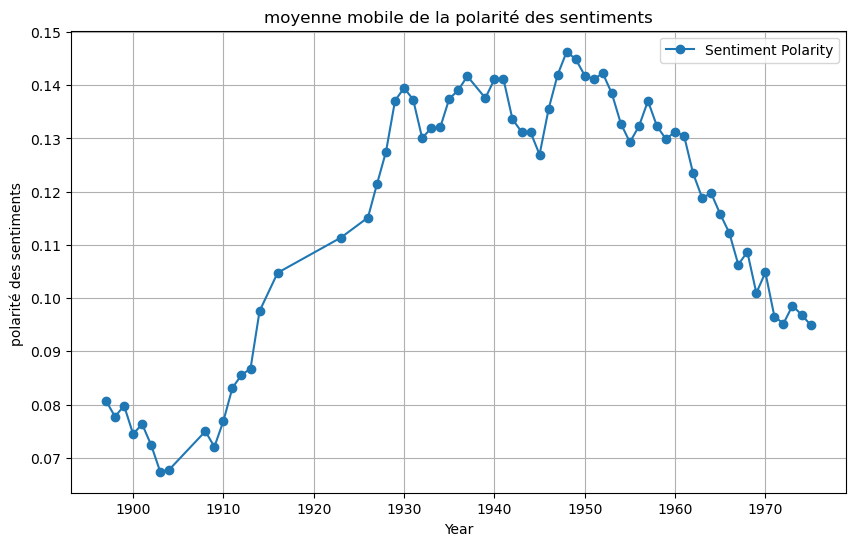

In [33]:
import matplotlib.pyplot as plt

# Sort the years and values together based on years
sorted_polarities = sorted(zip(years[:80], avg_polarities[:80]))

# Extract sorted years and values
sorted_years, sorted_values = zip(*sorted_polarities)


window_size = 15 #years
# Calculate the rolling average
rolling_avg = [sum(sorted_values[i:i+window_size]) / window_size for i in range(len(sorted_values) - window_size + 1)]

# Create a new list of years corresponding to the rolling averages
rolling_avg_years = sorted_years[window_size - 1:]

# Plot the moving average
plt.figure(figsize=(10, 6))
plt.plot(rolling_avg_years, rolling_avg, label='Sentiment Polarity', marker='o')

plt.xlabel('Year')
plt.ylabel('polarité des sentiments ')
plt.title('moyenne mobile de la polarité des sentiments')
plt.legend()
plt.grid(True)
plt.show()

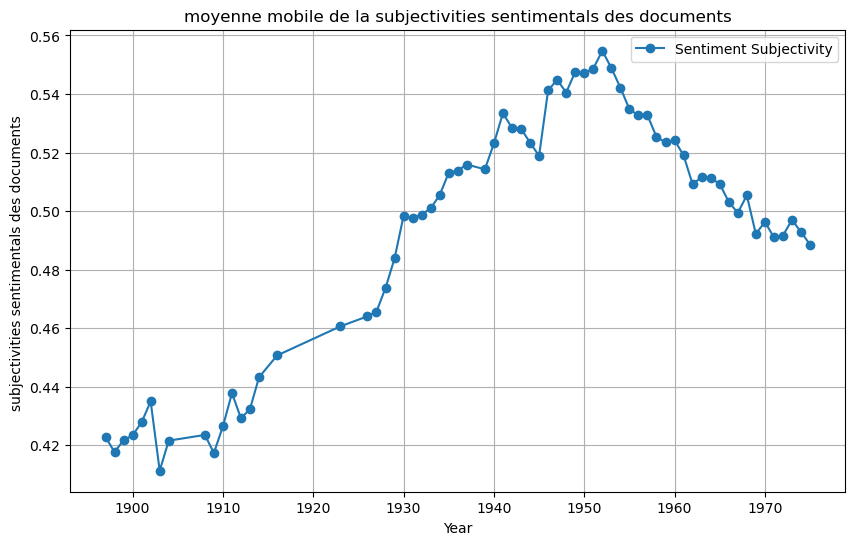

In [34]:
# Sort the years and values together based on years
sorted_subjectivities = sorted(zip(years[:80], avg_subjectivities[:80]))

# Extract sorted years and values
sorted_years, sorted_values = zip(*sorted_subjectivities)


window_size = 15 #years
# Calculate the rolling average
rolling_avg = [sum(sorted_values[i:i+window_size]) / window_size for i in range(len(sorted_values) - window_size + 1)]

# Create a new list of years corresponding to the rolling averages
rolling_avg_years = sorted_years[window_size - 1:]

# Plot the moving average
plt.figure(figsize=(10, 6))
plt.plot(rolling_avg_years, rolling_avg, label='Sentiment Subjectivity', marker='o')

plt.xlabel('Year')
plt.ylabel('subjectivities sentimentals des documents ')
plt.title('moyenne mobile de la subjectivities sentimentals des documents')
plt.legend()
plt.grid(True)
plt.show()

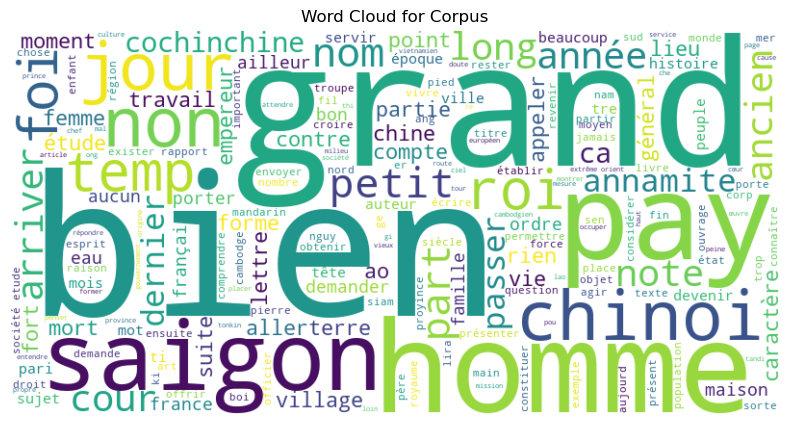

In [58]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import spacy

# # Load the spaCy French language model
# nlp = spacy.load("fr_core_news_sm")

# most_common_words = word_freq.most_common(3000)
# most_common_words_list = [w for w,d in most_common_words]

# most_common_verbs = []

# # Process the tokens with spaCy
# doc = nlp(" ".join(most_common_words_list))

# # Filter out tokens that are verbs
# most_common_verbs = [token.text for token in doc if token.pos_ == "VERB"]
filter_vb_tokens = []
for lm in lemmatized_tokens:
    if lm not in most_common_verbs[:11]:
        filter_vb_tokens.append(lm)

# Combine all the text in the corpus into a single string
text = " ".join(filter_vb_tokens)

# Create a word cloud using the WordCloud library
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

# Display the word cloud using Matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud for Corpus")
plt.show()


In [60]:
import spacy

# Load the spaCy French language model
nlp = spacy.load("fr_core_news_sm")

most_common_words = word_freq.most_common(3000)
most_common_words_list = [w for w,d in most_common_words]

most_common_verbs = []

# Process the tokens with spaCy
doc = nlp(" ".join(most_common_words_list))

# Filter out tokens that are verbs
most_common_verbs = [token.text for token in doc if token.pos_ == "VERB"]

# Specify the file path where you want to save the text
file_path = "most_common_verbs.txt"

# Open the file in write mode and write the text
with open(file_path, "w", encoding="utf-8") as file:
    for v in most_common_verbs:
        file.write(v + "\n")

print(f"Text saved to {file_path}")


Text saved to most_common_verbs.txt


In [59]:
'bien' in french_stopwords_spacy

False